In [1]:
import numpy as np

# Load the .npz file
file_path = "../output/Feature_0.npz"  # Replace with your actual file path
data = np.load(file_path)

# List all arrays stored in the .npz file
print("Keys in the .npz file:", data.files)

# Iterate through keys and display their contents
for key in data.files:
    print(f"\nKey: {key}")
    print(data[key])  # Print the array values

# Optionally, access a specific array
# specific_array = data['your_key']  # Replace 'your_key' with an actual key


Keys in the .npz file: ['train_feature', 'val_feature', 'train_targets', 'val_targets']

Key: train_feature
[[[8.31223726e-01 0.00000000e+00 1.35774910e-01 ... 0.00000000e+00
   2.29769915e-01 0.00000000e+00]
  [1.01026869e+00 0.00000000e+00 3.45286429e-02 ... 0.00000000e+00
   2.95373738e-01 1.36469901e-02]
  [1.24193394e+00 0.00000000e+00 1.41269118e-02 ... 3.75440180e-01
   3.70096058e-01 5.05899489e-02]
  ...
  [4.29897356e+00 3.50051641e+00 0.00000000e+00 ... 2.98917007e+00
   2.09616351e+00 2.18428659e+00]
  [6.39792800e-01 1.82759643e+00 0.00000000e+00 ... 4.67672884e-01
   2.26986647e-01 0.00000000e+00]
  [0.00000000e+00 2.57346706e+01 0.00000000e+00 ... 1.96582425e+00
   2.50720668e+00 7.48671675e+00]]

 [[0.00000000e+00 0.00000000e+00 5.68466842e-01 ... 0.00000000e+00
   2.14345738e-01 0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 6.28461957e-01 ... 0.00000000e+00
   1.43238395e-01 0.00000000e+00]
  [4.45499569e-02 0.00000000e+00 5.78709543e-01 ... 0.00000000e+00
   2.1441

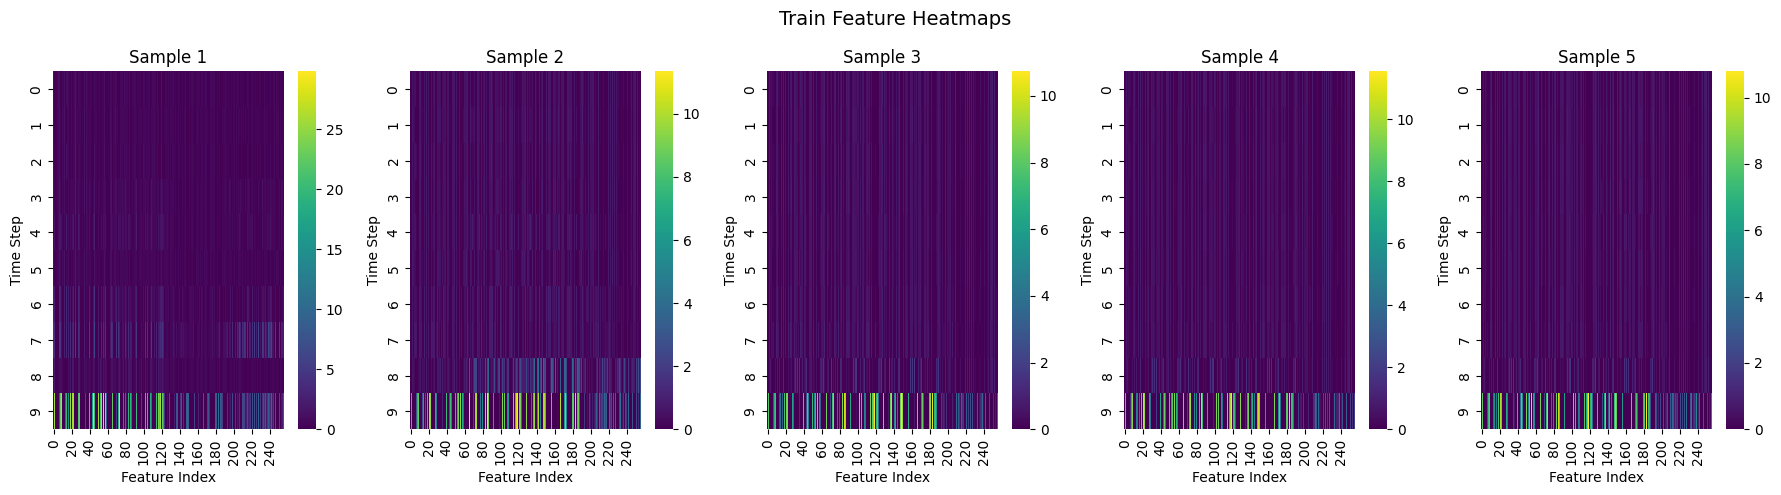

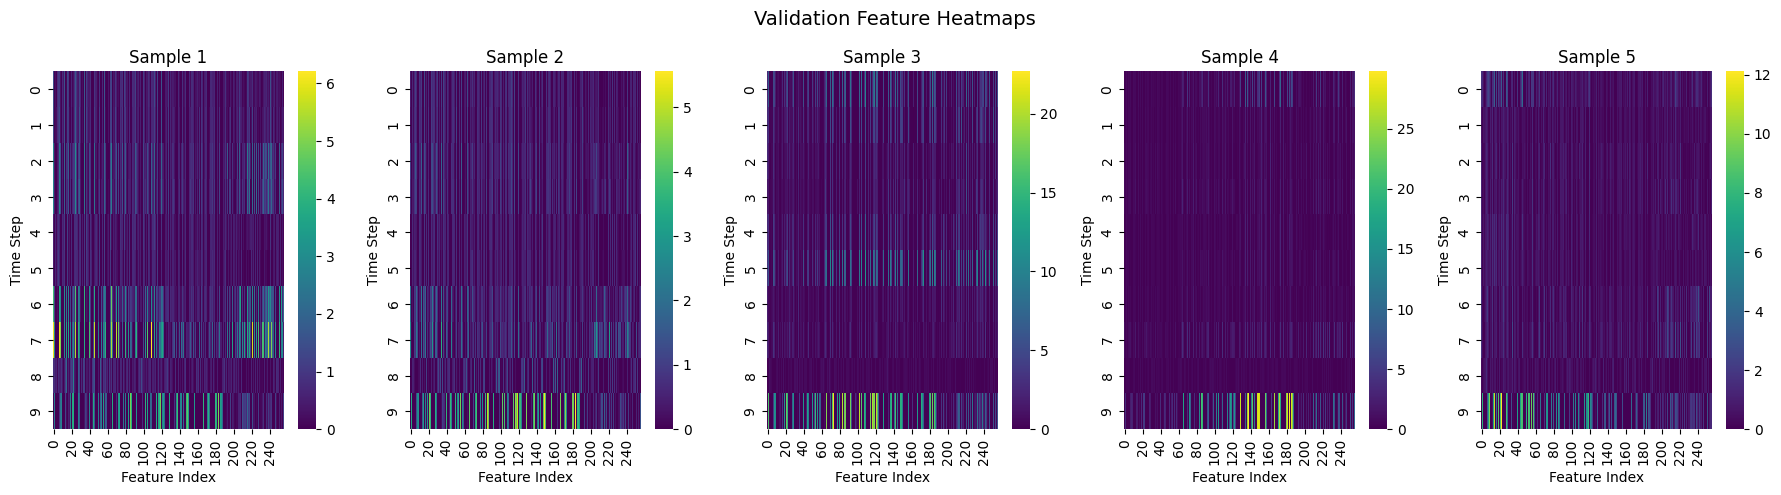

C:\Users\Victus\AppData\Local\Temp\ipykernel_4100\1052068956.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=np.arange(num_classes), y=class_counts, palette="magma")


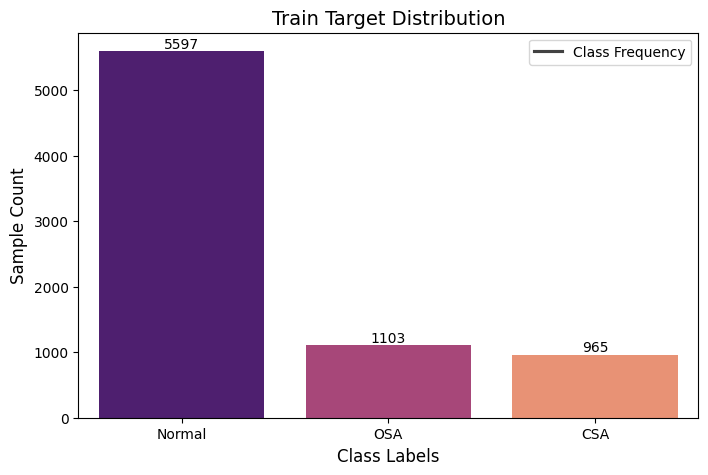

C:\Users\Victus\AppData\Local\Temp\ipykernel_4100\1052068956.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=np.arange(num_classes), y=class_counts, palette="magma")


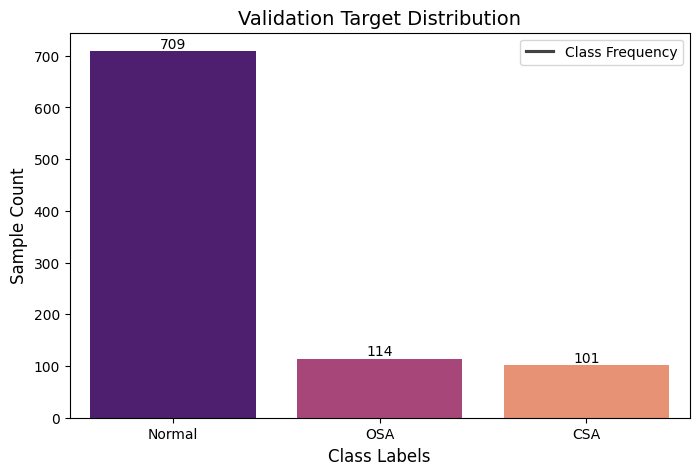

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the .npz file
file_path = "../output/Feature_0.npz"  # Replace with the actual file path
data = np.load(file_path)

# Extract features and targets
train_feature = data['train_feature']  # Shape: (samples, timesteps, features)
val_feature = data['val_feature']
train_targets = data['train_targets']  # Shape: (samples, num_classes)
val_targets = data['val_targets']

# Convert 5-class targets to 3-class mapping
def map_labels(targets):
    original_labels = np.argmax(targets, axis=1)  # Convert one-hot to label indices
    
    mapped_labels = np.copy(original_labels)
    mapped_labels[np.isin(original_labels, [0, 2, 3])] = 0  # Normal: Wake, N2, N3
    mapped_labels[original_labels == 1] = 1  # OSA: N1
    mapped_labels[np.isin(original_labels, [4, 5])] = 2  # CSA: REM (Fix applied)

    # Convert back to one-hot encoding
    new_targets = np.eye(3)[mapped_labels]  
    return new_targets

# Apply label mapping
train_targets = map_labels(train_targets)
val_targets = map_labels(val_targets)

# Function to plot feature heatmaps
def plot_feature_heatmap(features, title, num_samples=5):
    fig, axes = plt.subplots(1, num_samples, figsize=(18, 5))
    fig.suptitle(title, fontsize=14)

    for i in range(num_samples):
        ax = axes[i]
        sns.heatmap(features[i], cmap="viridis", ax=ax, cbar=True)
        ax.set_title(f"Sample {i+1}")
        ax.set_xlabel("Feature Index")
        ax.set_ylabel("Time Step")

    plt.tight_layout()
    plt.show()

# Plot heatmaps for train and validation features
plot_feature_heatmap(train_feature, "Train Feature Heatmaps")
plot_feature_heatmap(val_feature, "Validation Feature Heatmaps")

# Function to plot target distributions
def plot_target_distribution(targets, title):
    class_counts = np.sum(targets, axis=0)  # Count occurrences of each class
    num_classes = len(class_counts)
    
    plt.figure(figsize=(8, 5))
    ax = sns.barplot(x=np.arange(num_classes), y=class_counts, palette="magma")
    
    # Labels and title
    plt.xlabel("Class Labels", fontsize=12)
    plt.ylabel("Sample Count", fontsize=12)
    plt.title(title, fontsize=14)
    plt.xticks(ticks=[0, 1, 2], labels=["Normal", "OSA", "CSA"])  # Updated class names
    
    # Add value labels on top of bars
    for p in ax.patches:
        ax.annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2, p.get_height()), 
                    ha='center', va='bottom', fontsize=10, color='black')

    plt.legend(["Class Frequency"], loc="upper right")
    plt.show()

# Plot target distributions
plot_target_distribution(train_targets, "Train Target Distribution")
plot_target_distribution(val_targets, "Validation Target Distribution")


In [6]:
import numpy as np
import glob

# Path to your NPZ files (update this to match your file location)
npz_files = glob.glob("../output/*.npz")  # Replace with actual folder path

# Initialize arrays to accumulate counts (for 3 classes)
total_train_counts = np.zeros(3, dtype=int)
total_val_counts = np.zeros(3, dtype=int)

# Function to map 5-class labels to 3-class
def map_labels(targets):
    original_labels = np.argmax(targets, axis=1)  # Convert one-hot to label indices
    
    mapped_labels = np.copy(original_labels)
    mapped_labels[np.isin(original_labels, [0, 2, 3])] = 0  # Normal: Wake, N2, N3
    mapped_labels[original_labels == 1] = 1  # OSA: N1
    mapped_labels[np.isin(original_labels, [4, 5])] = 2  # CSA: REM

    return mapped_labels

# Loop through each file
for file in npz_files:
    data = np.load(file)
    
    # Extract train and validation targets
    train_targets = data['train_targets']  # Shape: (samples, 5)
    val_targets = data['val_targets']      # Shape: (samples, 5)
    
    # Convert 5-class labels to 3-class labels
    mapped_train_labels = map_labels(train_targets)
    mapped_val_labels = map_labels(val_targets)
    
    # Sum the occurrences of each class
    total_train_counts += np.bincount(mapped_train_labels, minlength=3)
    total_val_counts += np.bincount(mapped_val_labels, minlength=3)

# Print the accumulated counts
print("Accumulated Train Sample Counts:", total_train_counts)
print("Accumulated Validation Sample Counts:", total_val_counts)

# Save the accumulated counts for future use
np.savez("accumulated_counts.npz", train_counts=total_train_counts, val_counts=total_val_counts)


Accumulated Train Sample Counts: [56754 10953  9594]
Accumulated Validation Sample Counts: [6306 1217 1066]


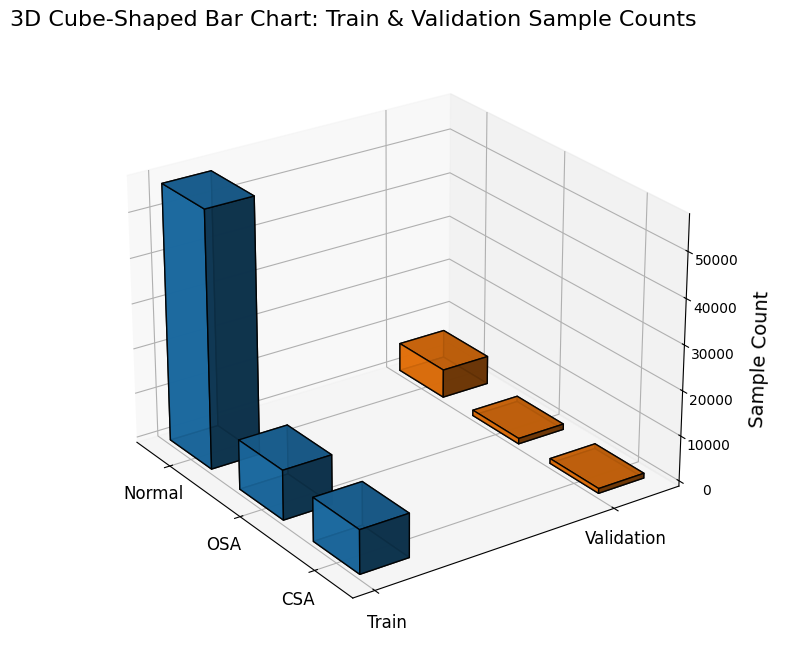

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Updated class labels (Mapped from 5-class to 3-class)
class_labels = ["Normal", "OSA", "CSA"]

# Original 5-class sample counts (W, N1, N2, N3, R)
train_sample_counts_5 = np.array([15066, 10953, 23544, 18144, 9594])
val_sample_counts_5 = np.array([1674, 1217, 2616, 2016, 1066])

# **Mapping 5-class counts to 3-class**
train_sample_counts = np.array([
    train_sample_counts_5[0] + train_sample_counts_5[2] + train_sample_counts_5[3],  # Normal: W + N2 + N3
    train_sample_counts_5[1],  # OSA: N1
    train_sample_counts_5[4]  # CSA: R
])

val_sample_counts = np.array([
    val_sample_counts_5[0] + val_sample_counts_5[2] + val_sample_counts_5[3],  # Normal: W + N2 + N3
    val_sample_counts_5[1],  # OSA: N1
    val_sample_counts_5[4]  # CSA: R
])

# X-axis positions for bars
x = np.arange(len(class_labels))
y_train = np.zeros(len(class_labels))  # Train bars at y=0
y_val = np.ones(len(class_labels))  # Validation bars at y=1
bar_width = 0.6  # Width of bars
bar_depth = 0.2  # Depth for cube effect

# Create figure and 3D axes
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Define colors
train_color = "#1f77b4"  # Deep blue
val_color = "#ff7f0e"  # Orange

# Plot Train cubes
ax.bar3d(x, y_train, np.zeros(len(train_sample_counts)), bar_width, bar_depth, train_sample_counts, 
         color=train_color, alpha=0.9, edgecolor="black", linewidth=1.0)

# Plot Validation cubes
ax.bar3d(x, y_val, np.zeros(len(val_sample_counts)), bar_width, bar_depth, val_sample_counts, 
         color=val_color, alpha=0.9, edgecolor="black", linewidth=1.0)

# Labels & Title
ax.set_zlabel("Sample Count", fontsize=14, labelpad=10)
ax.set_title("3D Cube-Shaped Bar Chart: Train & Validation Sample Counts            ", fontsize=16, pad=5)

# Set custom x-axis labels
ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(class_labels, fontsize=12)

# Set custom y-axis labels
ax.set_yticks([0, 1])
ax.set_yticklabels(["Train", "Validation"], fontsize=12)

# Rotate View for better visibility
ax.view_init(elev=25, azim=-35)  # Adjust angles for better 3D effect

# Show the plot
plt.show()


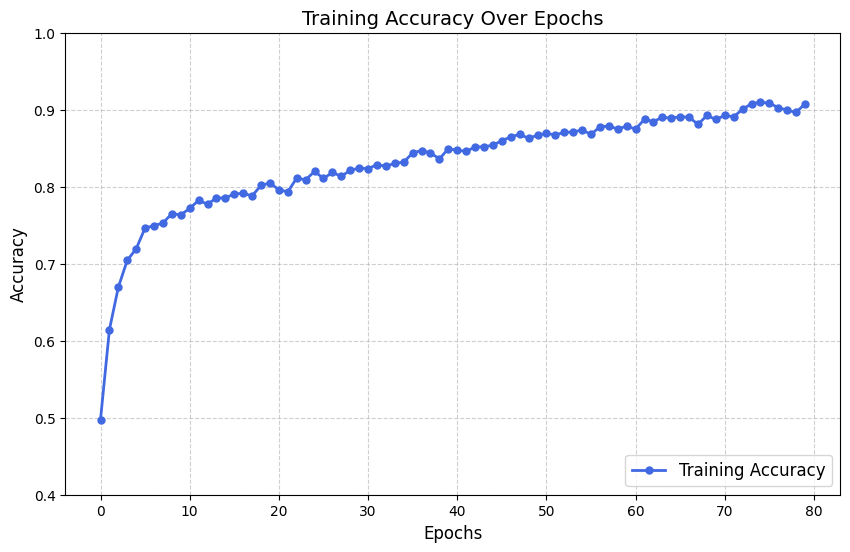

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Load data from the text file
file_path = "../output/acc.txt"  # Replace with your actual file path
with open(file_path, "r") as file:
    data = eval(file.read())  # Convert string list to Python list

# Convert data to numpy array for plotting
data = np.array(data)

# Plot the training accuracy
plt.figure(figsize=(10, 6))
plt.plot(data, marker='o', linestyle='-', color='royalblue', markersize=5, linewidth=2, label="Training Accuracy")

# Labels and title
plt.xlabel("Epochs", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.title("Training Accuracy Over Epochs", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.6)

# Set y-axis limits (optional, for better visualization)
plt.ylim(0.4, 1.0)  

# Add legend
plt.legend(loc="lower right", fontsize=12)

# Show the plot
plt.show()


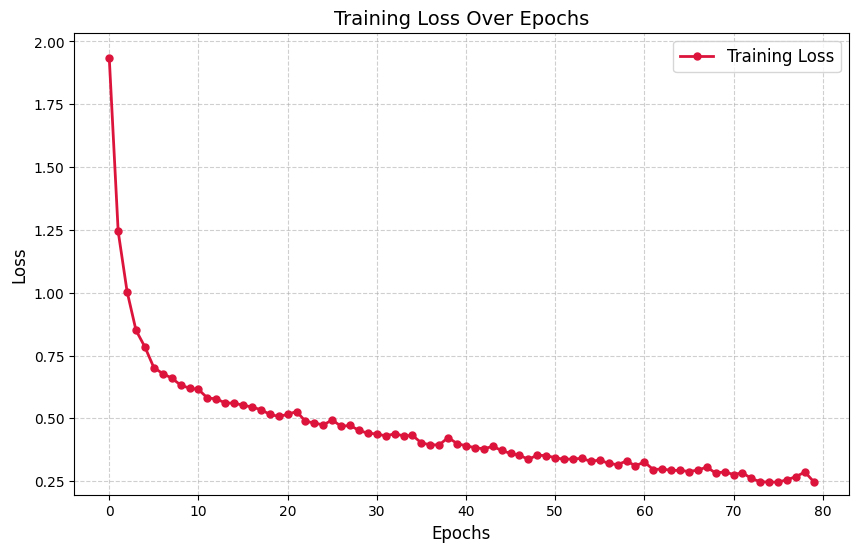

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Training loss values (from your text file)
training_loss = [
    1.934607744216919, 1.2438409328460693, 1.0044540166854858, 0.8503838777542114, 0.7839520573616028, 0.7020424008369446, 0.6780814528465271, 0.6603477597236633, 0.6326473951339722, 0.6200026869773865, 0.6152005791664124, 0.5812608599662781, 0.5776045322418213, 0.561384379863739, 0.5605239868164062, 0.5524193644523621, 0.5451400279998779, 0.534610390663147, 0.516072690486908, 0.507652997970581, 0.5157462954521179, 0.5273039937019348, 0.48852041363716125, 0.48152536153793335, 0.4738883674144745, 0.4938299357891083, 0.46835052967071533, 0.47187715768814087, 0.452186644077301, 0.4408160150051117, 0.43810218572616577, 0.43009740114212036, 0.4387682378292084, 0.4303032457828522, 0.4322073459625244, 0.4023919105529785, 0.3946476876735687, 0.3945981562137604, 0.42375051975250244, 0.39977359771728516, 0.39072340726852417, 0.3836226463317871, 0.37875011563301086, 0.3885856866836548, 0.37226584553718567, 0.3604356646537781, 0.35313647985458374, 0.33705633878707886, 0.3538088798522949, 0.3514747619628906, 0.34361985325813293, 0.33689162135124207, 0.33876273036003113, 0.3407823145389557, 0.3287671208381653, 0.33453741669654846, 0.3205246925354004, 0.31591781973838806, 0.330366313457489, 0.3113105893135071, 0.32644888758659363, 0.29603666067123413, 0.2989848554134369, 0.29295486211776733, 0.2931169867515564, 0.2885132431983948, 0.2940737307071686, 0.3062950074672699, 0.2821049392223358, 0.287395715713501, 0.2764652669429779, 0.28362005949020386, 0.26075324416160583, 0.2476874142885208, 0.24668867886066437, 0.24617540836334229, 0.25592321157455444, 0.26799869537353516, 0.28659379482269287, 0.24760863184928894
]

# Convert list to numpy array
training_loss = np.array(training_loss)

# Create figure
plt.figure(figsize=(10, 6))
plt.plot(training_loss, marker='o', linestyle='-', color='crimson', markersize=5, linewidth=2, label="Training Loss")

# Labels and title
plt.xlabel("Epochs", fontsize=12)
plt.ylabel("Loss", fontsize=12)
plt.title("Training Loss Over Epochs", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.6)

# Set y-axis limit for better visibility (Optional)
plt.ylim(min(training_loss) - 0.05, max(training_loss) + 0.1)

# Add legend
plt.legend(loc="upper right", fontsize=12)

# Show the plot
plt.show()


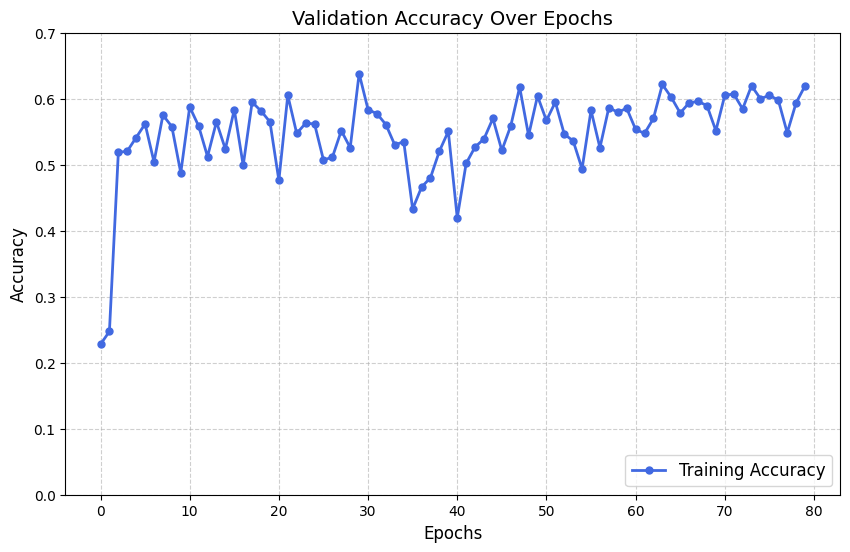

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Load data from the text file
file_path = "../output/val_acc.txt"  # Replace with your actual file path
with open(file_path, "r") as file:
    data = eval(file.read())  # Convert string list to Python list

# Convert data to numpy array for plotting
data = np.array(data)

# Plot the training accuracy
plt.figure(figsize=(10, 6))
plt.plot(data, marker='o', linestyle='-', color='royalblue', markersize=5, linewidth=2, label="Training Accuracy")

# Labels and title
plt.xlabel("Epochs", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.title("Validation Accuracy Over Epochs", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.6)

# Set y-axis limits (optional, for better visualization)
plt.ylim(0, 0.7)  

# Add legend
plt.legend(loc="lower right", fontsize=12)

# Show the plot
plt.show()


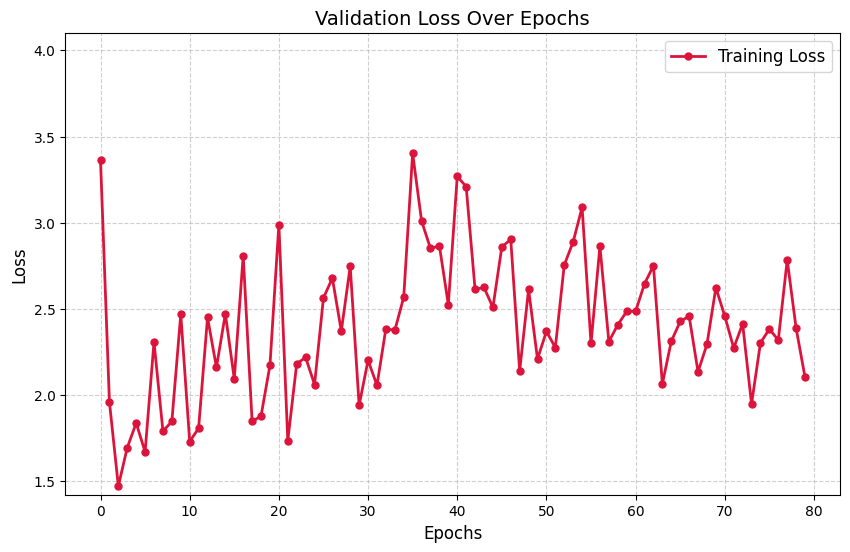

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Training loss values (from your text file)
training_loss = [3.364168405532837, 1.959372878074646, 1.470732569694519, 1.694137454032898, 1.8367363214492798, 1.6694447994232178, 2.307551383972168, 1.7895797491073608, 1.8458374738693237, 2.468529462814331, 1.7292383909225464, 1.8068063259124756, 2.4496331214904785, 2.160128355026245, 2.470780372619629, 2.0934414863586426, 2.8088419437408447, 1.8458198308944702, 1.8774359226226807, 2.1720077991485596, 2.9888954162597656, 1.7342954874038696, 2.180717706680298, 2.2178778648376465, 2.060417652130127, 2.563347578048706, 2.677741289138794, 2.370237350463867, 2.7462425231933594, 1.9394046068191528, 2.201333522796631, 2.055757522583008, 2.38502836227417, 2.374483585357666, 2.567396402359009, 3.402369499206543, 3.0101778507232666, 2.850050926208496, 2.8656492233276367, 2.5242226123809814, 3.2678287029266357, 3.2097291946411133, 2.612567186355591, 2.6239724159240723, 2.507809638977051, 2.858907461166382, 2.903136730194092, 2.139369249343872, 2.6124303340911865, 2.2083137035369873, 2.368803024291992, 2.274911880493164, 2.753826856613159, 2.889096975326538, 3.0893161296844482, 2.298635721206665, 2.8634541034698486, 2.309290885925293, 2.4069814682006836, 2.484541654586792, 2.4853129386901855, 2.645038366317749, 2.749802589416504, 2.0635833740234375, 2.311038017272949, 2.426542282104492, 2.457158088684082, 2.134366512298584, 2.2934775352478027, 2.622453451156616, 2.4577760696411133, 2.271951675415039, 2.4129581451416016, 1.9473936557769775, 2.3023386001586914, 2.382294178009033, 2.318326234817505, 2.783190965652466, 2.3866171836853027, 2.101754665374756]

# Convert list to numpy array
training_loss = np.array(training_loss)

# Create figure
plt.figure(figsize=(10, 6))
plt.plot(training_loss, marker='o', linestyle='-', color='crimson', markersize=5, linewidth=2, label="Training Loss")

# Labels and title
plt.xlabel("Epochs", fontsize=12)
plt.ylabel("Loss", fontsize=12)
plt.title("Validation Loss Over Epochs", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.6)

# Set y-axis limit for better visibility (Optional)
plt.ylim(min(training_loss) - 0.05, max(training_loss)+0.6 + 0.1)

# Add legend
plt.legend(loc="upper right", fontsize=12)

# Show the plot
plt.show()


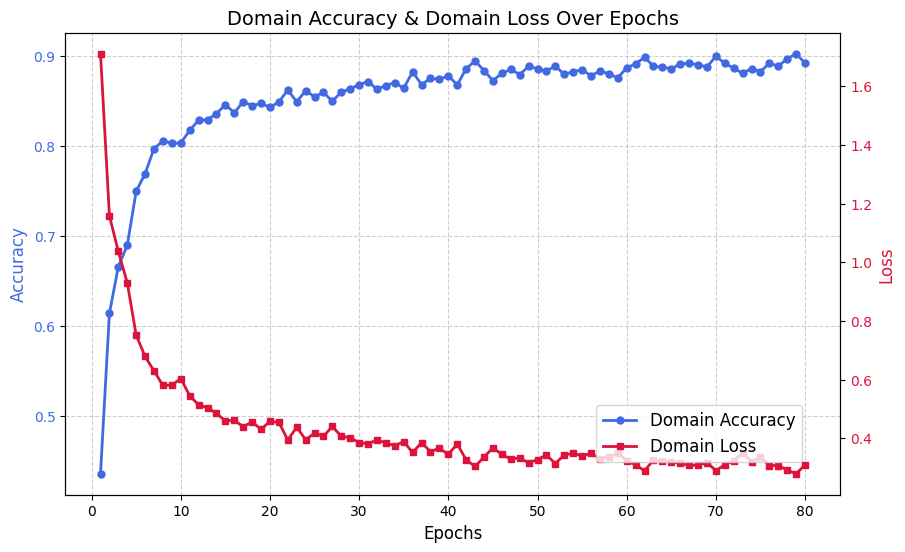

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Domain accuracy values
domain_accuracy = [0.4363708198070526, 0.6142687797546387, 0.6660951972007751, 0.6897006630897522, 0.7495713829994202, 0.7692206501960754, 0.7969141602516174, 0.8054859638214111, 0.8028484582901001, 0.8031122088432312, 0.8170908689498901, 0.828432023525238, 0.8289595246315002, 0.8356850743293762, 0.8457074761390686, 0.8366082310676575, 0.849004328250885, 0.844520628452301, 0.8471581339836121, 0.8426743745803833, 0.8487405776977539, 0.8619279861450195, 0.8487405776977539, 0.8611367344856262, 0.8544111847877502, 0.8591586351394653, 0.8495318293571472, 0.8596861362457275, 0.863246738910675, 0.8679941892623901, 0.8711591958999634, 0.8628511428833008, 0.8668073415756226, 0.870104193687439, 0.8639060854911804, 0.8822365999221802, 0.867730438709259, 0.8749834895133972, 0.8736647963523865, 0.8777528405189514, 0.8675985932350159, 0.8855334520339966, 0.8942371010780334, 0.8834234476089478, 0.872346043586731, 0.8803903460502625, 0.8848740458488464, 0.8790715932846069, 0.8881708979606628, 0.8854015469551086, 0.8830278515815735, 0.888434648513794, 0.8792034983634949, 0.8823684453964233, 0.8842146992683411, 0.8778847455978394, 0.8828959465026855, 0.8799947500228882, 0.8752472400665283, 0.8867202997207642, 0.8908084034919739, 0.8983252048492432, 0.8883028030395508, 0.8873796463012695, 0.8854015469551086, 0.8908084034919739, 0.8915996551513672, 0.8900171518325806, 0.8873796463012695, 0.8993802070617676, 0.8915996551513672, 0.8860609531402588, 0.8803903460502625, 0.8856652975082397, 0.8822365999221802, 0.8915996551513672, 0.888434648513794, 0.8964789509773254, 0.9021495580673218, 0.8917315006256104]

# Domain loss values
domain_loss =[1.7108407020568848, 1.1580129861831665, 1.036709189414978, 0.9301059246063232, 0.7512708306312561, 0.6790778636932373, 0.6297677159309387, 0.5799343585968018, 0.5810118913650513, 0.6037924289703369, 0.54506516456604, 0.5140258073806763, 0.5040886402130127, 0.4849061071872711, 0.45963913202285767, 0.46119213104248047, 0.43967393040657043, 0.45555853843688965, 0.43070659041404724, 0.4572271406650543, 0.4542000889778137, 0.3942180275917053, 0.43767431378364563, 0.39543285965919495, 0.4172898232936859, 0.4071691334247589, 0.44024816155433655, 0.4066503643989563, 0.4016607105731964, 0.3855171799659729, 0.38139861822128296, 0.3944799304008484, 0.38344746828079224, 0.37534868717193604, 0.3883436322212219, 0.35161006450653076, 0.385050505399704, 0.3548511564731598, 0.36564967036247253, 0.34532785415649414, 0.3806140124797821, 0.3264721930027008, 0.30398687720298767, 0.3360670506954193, 0.36760061979293823, 0.34487876296043396, 0.32919296622276306, 0.33359286189079285, 0.3162677586078644, 0.3276413083076477, 0.34303560853004456, 0.31403541564941406, 0.3431614339351654, 0.3486003279685974, 0.34064897894859314, 0.3481914699077606, 0.3309871256351471, 0.3369823098182678, 0.3495125472545624, 0.32329243421554565, 0.30966418981552124, 0.2890404760837555, 0.32628992199897766, 0.32144975662231445, 0.32045355439186096, 0.31431400775909424, 0.30828577280044556, 0.3084636330604553, 0.31745830178260803, 0.2899623215198517, 0.309675931930542, 0.32367509603500366, 0.34973517060279846, 0.320125013589859, 0.33707478642463684, 0.3066980838775635, 0.30720850825309753, 0.2916957139968872, 0.27921685576438904, 0.30974018573760986]

# Convert lists to numpy arrays
epochs = np.arange(1, len(domain_accuracy) + 1)

# Create figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot Domain Accuracy (Primary Y-axis)
ax1.plot(epochs, domain_accuracy, marker='o', linestyle='-', color='royalblue', markersize=5, linewidth=2, label="Domain Accuracy")
ax1.set_xlabel("Epochs", fontsize=12)
ax1.set_ylabel("Accuracy", fontsize=12, color='royalblue')
ax1.tick_params(axis='y', labelcolor='royalblue')
ax1.grid(True, linestyle="--", alpha=0.6)

# Create second y-axis for Domain Loss
ax2 = ax1.twinx()
ax2.plot(epochs, domain_loss, marker='s', linestyle='-', color='crimson', markersize=5, linewidth=2, label="Domain Loss")
ax2.set_ylabel("Loss", fontsize=12, color='crimson')
ax2.tick_params(axis='y', labelcolor='crimson')

# Title and Legends
plt.title("Domain Accuracy & Domain Loss Over Epochs", fontsize=14)
fig.legend(loc="lower right", bbox_to_anchor=(0.87, 0.15), fontsize=12)

# Show the plot
plt.show()


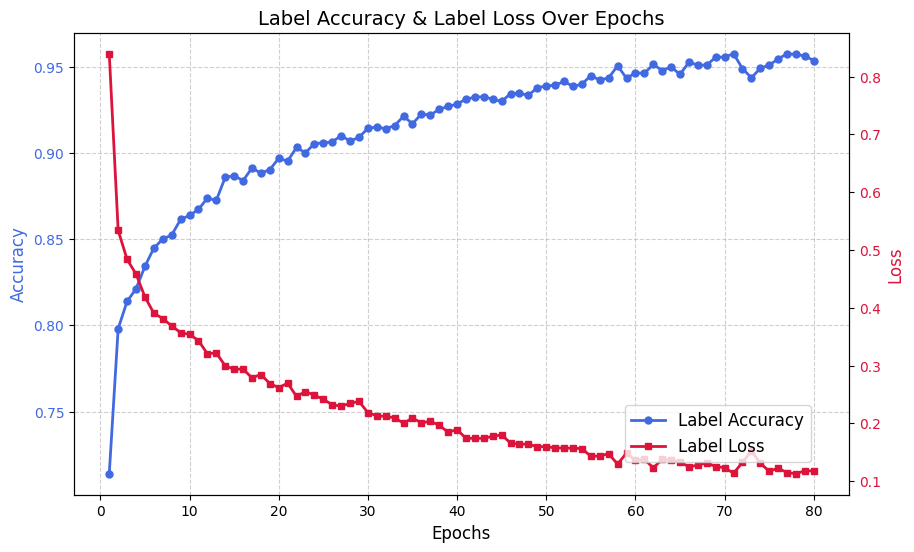

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Domain accuracy values
domain_accuracy = [0.7139654755592346, 0.798101007938385, 0.8139258623123169, 0.8211789727210999, 0.8342344760894775, 0.8447843790054321, 0.8500593304634094, 0.8524330854415894, 0.8614004850387573, 0.8637742400169373, 0.8672029376029968, 0.8737966418266296, 0.8724778890609741, 0.8857972025871277, 0.8868521451950073, 0.88395094871521, 0.8912039995193481, 0.8883028030395508, 0.8902809023857117, 0.8968746066093445, 0.8952921032905579, 0.9032045602798462, 0.900039553642273, 0.9054464101791382, 0.9058420062065125, 0.9063695073127747, 0.9100619554519653, 0.9068970084190369, 0.9090070128440857, 0.914281964302063, 0.9150732159614563, 0.9140182137489319, 0.9158644080162048, 0.9212712645530701, 0.9169194102287292, 0.9225900173187256, 0.9219306111335754, 0.9253593683242798, 0.9269418716430664, 0.9283924698829651, 0.9311618208885193, 0.9323486685752869, 0.932612419128418, 0.9311618208885193, 0.9298430681228638, 0.9344586730003357, 0.9345905184745789, 0.9334036707878113, 0.9378873705863953, 0.9388104677200317, 0.939337968826294, 0.9414479732513428, 0.9385467767715454, 0.9398654699325562, 0.9448766708374023, 0.9422392249107361, 0.9435579776763916, 0.9505472779273987, 0.9432942271232605, 0.946459174156189, 0.9461954236030579, 0.951338529586792, 0.9477779269218445, 0.9498879313468933, 0.9455360770225525, 0.9526572823524475, 0.950942873954773, 0.950942873954773, 0.9555584788322449, 0.9555584788322449, 0.9575365781784058, 0.9489647746086121, 0.9435579776763916, 0.9490966796875, 0.950942873954773, 0.9545034766197205, 0.9575365781784058, 0.9571409821510315, 0.956217885017395, 0.953580379486084]

# Domain loss values
domain_loss = [0.8395400047302246, 0.5337414145469666, 0.48362258076667786, 0.45836761593818665, 0.41882431507110596, 0.3904719054698944, 0.3813015818595886, 0.3685154616832733, 0.35688555240631104, 0.3538724184036255, 0.34325239062309265, 0.32043564319610596, 0.3217877149581909, 0.29954794049263, 0.2935815155506134, 0.2938591539859772, 0.2788550555706024, 0.28448155522346497, 0.2688574492931366, 0.26177656650543213, 0.26949673891067505, 0.24653710424900055, 0.25496333837509155, 0.24858979880809784, 0.24167098104953766, 0.23208077251911163, 0.22971928119659424, 0.23456263542175293, 0.237979456782341, 0.2185971736907959, 0.21295736730098724, 0.2120826691389084, 0.20954473316669464, 0.20009976625442505, 0.20918235182762146, 0.20076383650302887, 0.20362509787082672, 0.19645166397094727, 0.18482066690921783, 0.18894678354263306, 0.1741379350423813, 0.17393164336681366, 0.1741519272327423, 0.1774829775094986, 0.1799526810646057, 0.16577713191509247, 0.1639699637889862, 0.16398495435714722, 0.15958131849765778, 0.1596786230802536, 0.15734465420246124, 0.15734657645225525, 0.15687806904315948, 0.15634000301361084, 0.14288410544395447, 0.14365851879119873, 0.1473044753074646, 0.12946026027202606, 0.1485847532749176, 0.13583528995513916, 0.13788148760795593, 0.12292332947254181, 0.13773393630981445, 0.1361309438943863, 0.13325940072536469, 0.12461532652378082, 0.12758755683898926, 0.13172569870948792, 0.12522338330745697, 0.12324463576078415, 0.11352822184562683, 0.13241839408874512, 0.1521034985780716, 0.130863755941391, 0.11713045090436935, 0.12227478623390198, 0.11467315256595612, 0.11279544234275818, 0.11789098381996155, 0.11772755533456802]

# Convert lists to numpy arrays
epochs = np.arange(1, len(domain_accuracy) + 1)

# Create figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot Domain Accuracy (Primary Y-axis)
ax1.plot(epochs, domain_accuracy, marker='o', linestyle='-', color='royalblue', markersize=5, linewidth=2, label="Label Accuracy")
ax1.set_xlabel("Epochs", fontsize=12)
ax1.set_ylabel("Accuracy", fontsize=12, color='royalblue')
ax1.tick_params(axis='y', labelcolor='royalblue')
ax1.grid(True, linestyle="--", alpha=0.6)

# Create second y-axis for Domain Loss
ax2 = ax1.twinx()
ax2.plot(epochs, domain_loss, marker='s', linestyle='-', color='crimson', markersize=5, linewidth=2, label="Label Loss")
ax2.set_ylabel("Loss", fontsize=12, color='crimson')
ax2.tick_params(axis='y', labelcolor='crimson')

# Title and Legends
plt.title("Label Accuracy & Label Loss Over Epochs", fontsize=14)
fig.legend(loc="lower right", bbox_to_anchor=(0.87, 0.15), fontsize=12)

# Show the plot
plt.show()


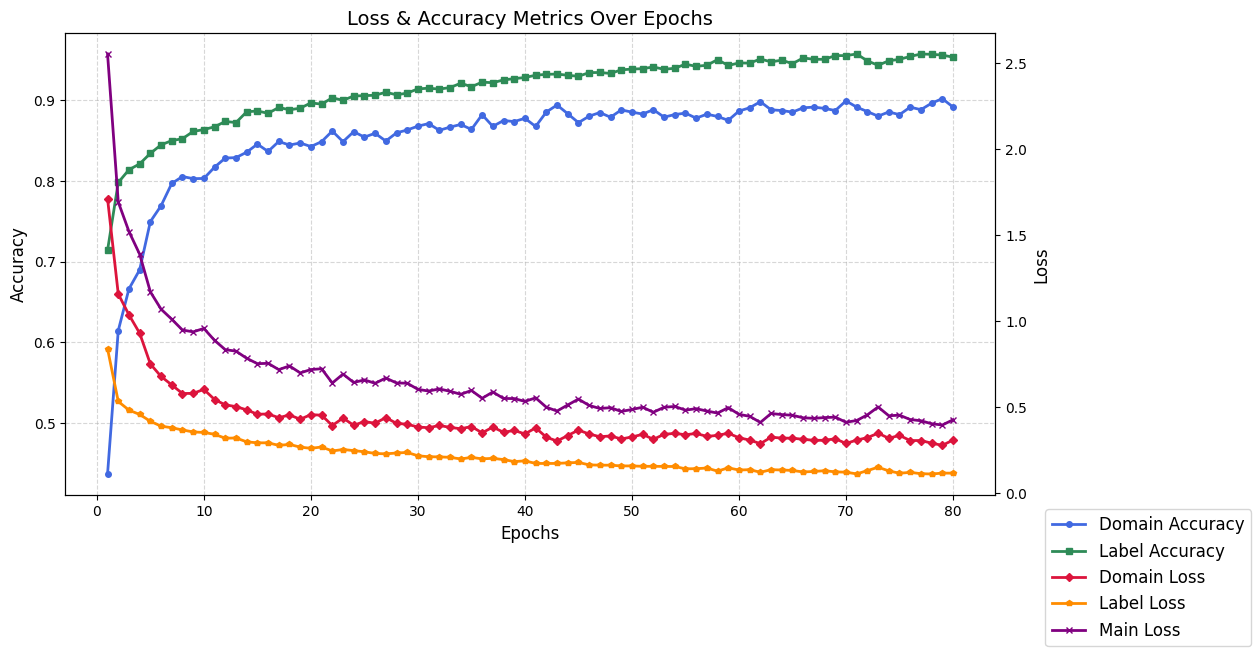

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Domain Accuracy
# Domain accuracy values
domain_accuracy = [0.4363708198070526, 0.6142687797546387, 0.6660951972007751, 0.6897006630897522, 0.7495713829994202, 0.7692206501960754, 0.7969141602516174, 0.8054859638214111, 0.8028484582901001, 0.8031122088432312, 0.8170908689498901, 0.828432023525238, 0.8289595246315002, 0.8356850743293762, 0.8457074761390686, 0.8366082310676575, 0.849004328250885, 0.844520628452301, 0.8471581339836121, 0.8426743745803833, 0.8487405776977539, 0.8619279861450195, 0.8487405776977539, 0.8611367344856262, 0.8544111847877502, 0.8591586351394653, 0.8495318293571472, 0.8596861362457275, 0.863246738910675, 0.8679941892623901, 0.8711591958999634, 0.8628511428833008, 0.8668073415756226, 0.870104193687439, 0.8639060854911804, 0.8822365999221802, 0.867730438709259, 0.8749834895133972, 0.8736647963523865, 0.8777528405189514, 0.8675985932350159, 0.8855334520339966, 0.8942371010780334, 0.8834234476089478, 0.872346043586731, 0.8803903460502625, 0.8848740458488464, 0.8790715932846069, 0.8881708979606628, 0.8854015469551086, 0.8830278515815735, 0.888434648513794, 0.8792034983634949, 0.8823684453964233, 0.8842146992683411, 0.8778847455978394, 0.8828959465026855, 0.8799947500228882, 0.8752472400665283, 0.8867202997207642, 0.8908084034919739, 0.8983252048492432, 0.8883028030395508, 0.8873796463012695, 0.8854015469551086, 0.8908084034919739, 0.8915996551513672, 0.8900171518325806, 0.8873796463012695, 0.8993802070617676, 0.8915996551513672, 0.8860609531402588, 0.8803903460502625, 0.8856652975082397, 0.8822365999221802, 0.8915996551513672, 0.888434648513794, 0.8964789509773254, 0.9021495580673218, 0.8917315006256104]

# Domain loss values
domain_loss =[1.7108407020568848, 1.1580129861831665, 1.036709189414978, 0.9301059246063232, 0.7512708306312561, 0.6790778636932373, 0.6297677159309387, 0.5799343585968018, 0.5810118913650513, 0.6037924289703369, 0.54506516456604, 0.5140258073806763, 0.5040886402130127, 0.4849061071872711, 0.45963913202285767, 0.46119213104248047, 0.43967393040657043, 0.45555853843688965, 0.43070659041404724, 0.4572271406650543, 0.4542000889778137, 0.3942180275917053, 0.43767431378364563, 0.39543285965919495, 0.4172898232936859, 0.4071691334247589, 0.44024816155433655, 0.4066503643989563, 0.4016607105731964, 0.3855171799659729, 0.38139861822128296, 0.3944799304008484, 0.38344746828079224, 0.37534868717193604, 0.3883436322212219, 0.35161006450653076, 0.385050505399704, 0.3548511564731598, 0.36564967036247253, 0.34532785415649414, 0.3806140124797821, 0.3264721930027008, 0.30398687720298767, 0.3360670506954193, 0.36760061979293823, 0.34487876296043396, 0.32919296622276306, 0.33359286189079285, 0.3162677586078644, 0.3276413083076477, 0.34303560853004456, 0.31403541564941406, 0.3431614339351654, 0.3486003279685974, 0.34064897894859314, 0.3481914699077606, 0.3309871256351471, 0.3369823098182678, 0.3495125472545624, 0.32329243421554565, 0.30966418981552124, 0.2890404760837555, 0.32628992199897766, 0.32144975662231445, 0.32045355439186096, 0.31431400775909424, 0.30828577280044556, 0.3084636330604553, 0.31745830178260803, 0.2899623215198517, 0.309675931930542, 0.32367509603500366, 0.34973517060279846, 0.320125013589859, 0.33707478642463684, 0.3066980838775635, 0.30720850825309753, 0.2916957139968872, 0.27921685576438904, 0.30974018573760986]
# Label Accuracy
label_accuracy = np.array([0.7139654755592346, 0.798101007938385, 0.8139258623123169, 0.8211789727210999, 0.8342344760894775, 0.8447843790054321, 0.8500593304634094, 0.8524330854415894, 0.8614004850387573, 0.8637742400169373, 0.8672029376029968, 0.8737966418266296, 0.8724778890609741, 0.8857972025871277, 0.8868521451950073, 0.88395094871521, 0.8912039995193481, 0.8883028030395508, 0.8902809023857117, 0.8968746066093445, 0.8952921032905579, 0.9032045602798462, 0.900039553642273, 0.9054464101791382, 0.9058420062065125, 0.9063695073127747, 0.9100619554519653, 0.9068970084190369, 0.9090070128440857, 0.914281964302063, 0.9150732159614563, 0.9140182137489319, 0.9158644080162048, 0.9212712645530701, 0.9169194102287292, 0.9225900173187256, 0.9219306111335754, 0.9253593683242798, 0.9269418716430664, 0.9283924698829651, 0.9311618208885193, 0.9323486685752869, 0.932612419128418, 0.9311618208885193, 0.9298430681228638, 0.9344586730003357, 0.9345905184745789, 0.9334036707878113, 0.9378873705863953, 0.9388104677200317, 0.939337968826294, 0.9414479732513428, 0.9385467767715454, 0.9398654699325562, 0.9448766708374023, 0.9422392249107361, 0.9435579776763916, 0.9505472779273987, 0.9432942271232605, 0.946459174156189, 0.9461954236030579, 0.951338529586792, 0.9477779269218445, 0.9498879313468933, 0.9455360770225525, 0.9526572823524475, 0.950942873954773, 0.950942873954773, 0.9555584788322449, 0.9555584788322449, 0.9575365781784058, 0.9489647746086121, 0.9435579776763916, 0.9490966796875, 0.950942873954773, 0.9545034766197205, 0.9575365781784058, 0.9571409821510315, 0.956217885017395, 0.953580379486084])  # Replace with your label accuracy values
# Label Loss
label_loss = np.array([0.8395400047302246, 0.5337414145469666, 0.48362258076667786, 0.45836761593818665, 0.41882431507110596, 0.3904719054698944, 0.3813015818595886, 0.3685154616832733, 0.35688555240631104, 0.3538724184036255, 0.34325239062309265, 0.32043564319610596, 0.3217877149581909, 0.29954794049263, 0.2935815155506134, 0.2938591539859772, 0.2788550555706024, 0.28448155522346497, 0.2688574492931366, 0.26177656650543213, 0.26949673891067505, 0.24653710424900055, 0.25496333837509155, 0.24858979880809784, 0.24167098104953766, 0.23208077251911163, 0.22971928119659424, 0.23456263542175293, 0.237979456782341, 0.2185971736907959, 0.21295736730098724, 0.2120826691389084, 0.20954473316669464, 0.20009976625442505, 0.20918235182762146, 0.20076383650302887, 0.20362509787082672, 0.19645166397094727, 0.18482066690921783, 0.18894678354263306, 0.1741379350423813, 0.17393164336681366, 0.1741519272327423, 0.1774829775094986, 0.1799526810646057, 0.16577713191509247, 0.1639699637889862, 0.16398495435714722, 0.15958131849765778, 0.1596786230802536, 0.15734465420246124, 0.15734657645225525, 0.15687806904315948, 0.15634000301361084, 0.14288410544395447, 0.14365851879119873, 0.1473044753074646, 0.12946026027202606, 0.1485847532749176, 0.13583528995513916, 0.13788148760795593, 0.12292332947254181, 0.13773393630981445, 0.1361309438943863, 0.13325940072536469, 0.12461532652378082, 0.12758755683898926, 0.13172569870948792, 0.12522338330745697, 0.12324463576078415, 0.11352822184562683, 0.13241839408874512, 0.1521034985780716, 0.130863755941391, 0.11713045090436935, 0.12227478623390198, 0.11467315256595612, 0.11279544234275818, 0.11789098381996155, 0.11772755533456802])  # Replace with your label loss values
# Main Loss (Your provided values)
main_loss = np.array([2.5505499839782715, 1.6917674541473389, 1.5202610492706299, 1.3884859085083008, 1.1701372861862183, 1.0695669651031494, 1.0110403299331665, 0.9484110474586487, 0.9378916025161743, 0.9576595425605774, 0.8882908821105957, 0.8344414830207825, 0.8258917331695557, 0.7844974994659424, 0.7532168626785278, 0.7550672888755798, 0.7185356616973877, 0.7400514483451843, 0.6995635032653809, 0.7190338969230652, 0.7236349582672119, 0.6407662034034729, 0.6926462650299072, 0.6439961194992065, 0.658932089805603, 0.6392392516136169, 0.6699473261833191, 0.6411896347999573, 0.6396622061729431, 0.6041269302368164, 0.5943570733070374, 0.6065614819526672, 0.5929887890815735, 0.5753926634788513, 0.5975150465965271, 0.5523515939712524, 0.5886616706848145, 0.5512946844100952, 0.5505062341690063, 0.5342551469802856, 0.5547637343406677, 0.5003944039344788, 0.47817739844322205, 0.5135248899459839, 0.5475181341171265, 0.510640561580658, 0.49314722418785095, 0.49759218096733093, 0.4758704602718353, 0.4873336851596832, 0.500352144241333, 0.47135087847709656, 0.500017523765564, 0.5049237608909607, 0.4835304915904999, 0.4918231666088104, 0.47829002141952515, 0.46640604734420776, 0.4980728328227997, 0.4591418504714966, 0.4475543797016144, 0.41198959946632385, 0.46402624249458313, 0.4575834274291992, 0.4536784589290619, 0.43892306089401245, 0.4358947277069092, 0.44015371799468994, 0.4427131712436676, 0.4132118821144104, 0.42320290207862854, 0.4561038315296173, 0.5018110275268555, 0.450967013835907, 0.45419105887413025, 0.42897579073905945, 0.42184606194496155, 0.4045153558254242, 0.3971298933029175, 0.42743727564811707])

# Define epochs
epochs = np.arange(1, len(main_loss) + 1)

# Create figure and first axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Accuracy (Primary Y-axis)
ax1.plot(epochs, domain_accuracy, marker='o', linestyle='-', color='royalblue', markersize=4, linewidth=2, label="Domain Accuracy")
ax1.plot(epochs, label_accuracy, marker='s', linestyle='-', color='seagreen', markersize=4, linewidth=2, label="Label Accuracy")
ax1.set_xlabel("Epochs", fontsize=12)
ax1.set_ylabel("Accuracy", fontsize=12, color='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.grid(True, linestyle="--", alpha=0.5)

# Create second Y-axis for Loss
ax2 = ax1.twinx()
ax2.plot(epochs, domain_loss, marker='D', linestyle='-', color='crimson', markersize=4, linewidth=2, label="Domain Loss")
ax2.plot(epochs, label_loss, marker='p', linestyle='-', color='darkorange', markersize=4, linewidth=2, label="Label Loss")
ax2.plot(epochs, main_loss, marker='x', linestyle='-', color='purple', markersize=5, linewidth=2, label="Main Loss")
ax2.set_ylabel("Loss", fontsize=12, color='black')
ax2.tick_params(axis='y', labelcolor='black')

# Title and Legends
plt.title("Loss & Accuracy Metrics Over Epochs", fontsize=14)
fig.legend(loc="upper right", bbox_to_anchor=(1.12, 0.1), fontsize=12)

# Show the plot
plt.show()


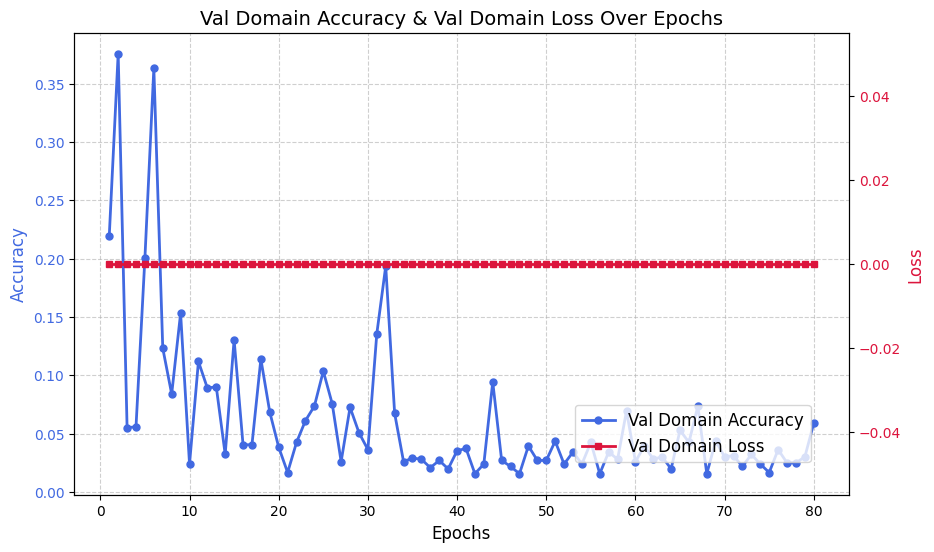

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Domain accuracy values
domain_accuracy = [0.21946169435977936, 0.37577641010284424, 0.05486542358994484, 0.05590062215924263, 0.20082814991474152, 0.36335402727127075, 0.12318840622901917, 0.0838509351015091, 0.15320910513401031, 0.02380952425301075, 0.11180124431848526, 0.08902691304683685, 0.09006211161613464, 0.03209109604358673, 0.1304347813129425, 0.04037266969680786, 0.04037266969680786, 0.11387163400650024, 0.06832297891378403, 0.03830227628350258, 0.01656314730644226, 0.042443063110113144, 0.06107660382986069, 0.07349896430969238, 0.10351967066526413, 0.07556936144828796, 0.025879917666316032, 0.07246376574039459, 0.050724636763334274, 0.036231882870197296, 0.13561075925827026, 0.19358177483081818, 0.06728778779506683, 0.025879917666316032, 0.028985507786273956, 0.027950311079621315, 0.020703934133052826, 0.026915114372968674, 0.019668737426400185, 0.035196688026189804, 0.03726708143949509, 0.01552795059978962, 0.02380952425301075, 0.09420289844274521, 0.026915114372968674, 0.021739130839705467, 0.01552795059978962, 0.03933747485280037, 0.026915114372968674, 0.026915114372968674, 0.043478261679410934, 0.02380952425301075, 0.034161489456892014, 0.02380952425301075, 0.042443063110113144, 0.01552795059978962, 0.034161489456892014, 0.027950311079621315, 0.06935817748308182, 0.025879917666316032, 0.03933747485280037, 0.027950311079621315, 0.030020704492926598, 0.019668737426400185, 0.05279503017663956, 0.042443063110113144, 0.07349896430969238, 0.01552795059978962, 0.043478261679410934, 0.030020704492926598, 0.03105590119957924, 0.021739130839705467, 0.03209109604358673, 0.02380952425301075, 0.01656314730644226, 0.036231882870197296, 0.02484472095966339, 0.02484472095966339, 0.030020704492926598, 0.059006210416555405]

# Domain loss values
domain_loss =[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

# Convert lists to numpy arrays
epochs = np.arange(1, len(domain_accuracy) + 1)

# Create figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot Domain Accuracy (Primary Y-axis)
ax1.plot(epochs, domain_accuracy, marker='o', linestyle='-', color='royalblue', markersize=5, linewidth=2, label="Val Domain Accuracy")
ax1.set_xlabel("Epochs", fontsize=12)
ax1.set_ylabel("Accuracy", fontsize=12, color='royalblue')
ax1.tick_params(axis='y', labelcolor='royalblue')
ax1.grid(True, linestyle="--", alpha=0.6)

# Create second y-axis for Domain Loss
ax2 = ax1.twinx()
ax2.plot(epochs, domain_loss, marker='s', linestyle='-', color='crimson', markersize=5, linewidth=2, label="Val Domain Loss")
ax2.set_ylabel("Loss", fontsize=12, color='crimson')
ax2.tick_params(axis='y', labelcolor='crimson')

# Title and Legends
plt.title("Val Domain Accuracy & Val Domain Loss Over Epochs", fontsize=14)
fig.legend(loc="lower right", bbox_to_anchor=(0.87, 0.15), fontsize=12)

# Show the plot
plt.show()


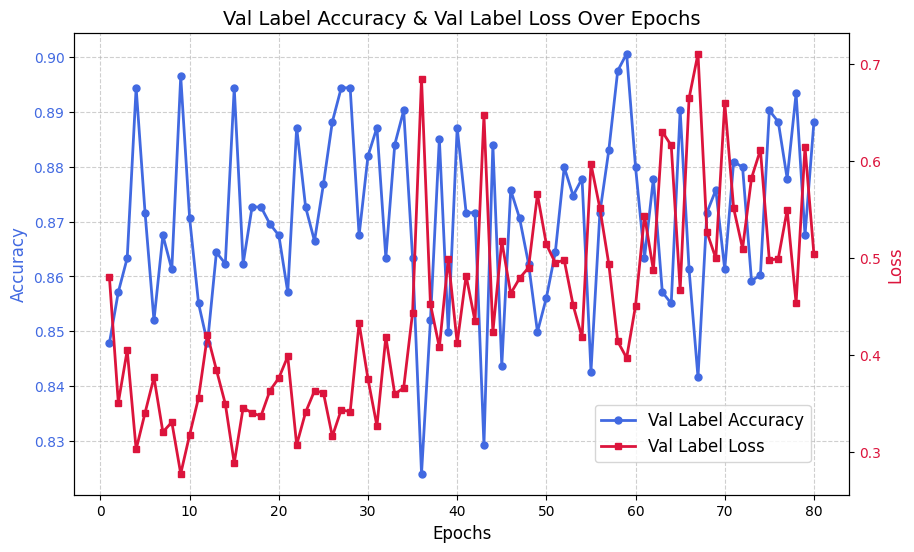

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Domain accuracy values
domain_accuracy =[0.8478260636329651, 0.8571428656578064, 0.8633540272712708, 0.8944099545478821, 0.8716356158256531, 0.8519668579101562, 0.8674948215484619, 0.8612836599349976, 0.8964803218841553, 0.8706004023551941, 0.8550724387168884, 0.8478260636329651, 0.8643892407417297, 0.8623188138008118, 0.8944099545478821, 0.8623188138008118, 0.8726708292961121, 0.8726708292961121, 0.8695651888847351, 0.8674948215484619, 0.8571428656578064, 0.8871635794639587, 0.8726708292961121, 0.8664596080780029, 0.8768116235733032, 0.888198733329773, 0.8944099545478821, 0.8944099545478821, 0.8674948215484619, 0.8819875717163086, 0.8871635794639587, 0.8633540272712708, 0.8840579986572266, 0.8902691602706909, 0.8633540272712708, 0.8240165710449219, 0.8519668579101562, 0.8850931525230408, 0.8498964905738831, 0.8871635794639587, 0.8716356158256531, 0.8716356158256531, 0.8291925191879272, 0.8840579986572266, 0.8436853289604187, 0.8757764101028442, 0.8706004023551941, 0.8623188138008118, 0.8498964905738831, 0.8561076521873474, 0.8643892407417297, 0.8799172043800354, 0.8747411966323853, 0.8778467774391174, 0.8426501154899597, 0.8716356158256531, 0.8830227851867676, 0.8975155353546143, 0.9006211161613464, 0.8799172043800354, 0.8633540272712708, 0.8778467774391174, 0.8571428656578064, 0.8550724387168884, 0.8902691602706909, 0.8612836599349976, 0.8416149020195007, 0.8716356158256531, 0.8757764101028442, 0.8612836599349976, 0.8809523582458496, 0.8799172043800354, 0.8592132329940796, 0.8602484464645386, 0.8902691602706909, 0.888198733329773, 0.8778467774391174, 0.8933747410774231, 0.8674948215484619, 0.888198733329773]

# Domain loss values
domain_loss = [0.4804314076900482, 0.3504851460456848, 0.4046855866909027, 0.3023073375225067, 0.34002044796943665, 0.37668368220329285, 0.32029610872268677, 0.3304464817047119, 0.2772503197193146, 0.31738463044166565, 0.35569465160369873, 0.41998496651649475, 0.3844687044620514, 0.34927377104759216, 0.28823113441467285, 0.3453892469406128, 0.339855819940567, 0.3368629217147827, 0.3629077970981598, 0.37600889801979065, 0.3982604444026947, 0.30703625082969666, 0.34057995676994324, 0.3627520799636841, 0.36076417565345764, 0.31578564643859863, 0.3432944715023041, 0.3411380350589752, 0.43257108330726624, 0.3748571276664734, 0.3265076279640198, 0.41849955916404724, 0.35933735966682434, 0.365844190120697, 0.44350960850715637, 0.6848028898239136, 0.4521128237247467, 0.4076218903064728, 0.4991663694381714, 0.4118812084197998, 0.48158618807792664, 0.4345141649246216, 0.647059977054596, 0.4233921468257904, 0.5172533988952637, 0.4631556272506714, 0.4789392948150635, 0.4898886978626251, 0.5654413104057312, 0.5137831568717957, 0.49485746026039124, 0.4976312220096588, 0.45107683539390564, 0.4178323745727539, 0.5968047976493835, 0.5509819984436035, 0.4935529828071594, 0.4137175381183624, 0.3966728746891022, 0.45076581835746765, 0.5436176061630249, 0.4870908558368683, 0.6300023794174194, 0.6158520579338074, 0.46683862805366516, 0.6646432280540466, 0.7105107307434082, 0.5264203548431396, 0.4995531141757965, 0.6601263284683228, 0.5511000156402588, 0.5095686316490173, 0.5821347832679749, 0.6114049553871155, 0.49750086665153503, 0.49909165501594543, 0.5492845177650452, 0.45319733023643494, 0.6143544912338257, 0.5035717487335205]

# Convert lists to numpy arrays
epochs = np.arange(1, len(domain_accuracy) + 1)

# Create figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot Domain Accuracy (Primary Y-axis)
ax1.plot(epochs, domain_accuracy, marker='o', linestyle='-', color='royalblue', markersize=5, linewidth=2, label="Val Label Accuracy")
ax1.set_xlabel("Epochs", fontsize=12)
ax1.set_ylabel("Accuracy", fontsize=12, color='royalblue')
ax1.tick_params(axis='y', labelcolor='royalblue')
ax1.grid(True, linestyle="--", alpha=0.6)

# Create second y-axis for Domain Loss
ax2 = ax1.twinx()
ax2.plot(epochs, domain_loss, marker='s', linestyle='-', color='crimson', markersize=5, linewidth=2, label="Val Label Loss")
ax2.set_ylabel("Loss", fontsize=12, color='crimson')
ax2.tick_params(axis='y', labelcolor='crimson')

# Title and Legends
plt.title("Val Label Accuracy & Val Label Loss Over Epochs", fontsize=14)
fig.legend(loc="lower right", bbox_to_anchor=(0.87, 0.15), fontsize=12)

# Show the plot
plt.show()


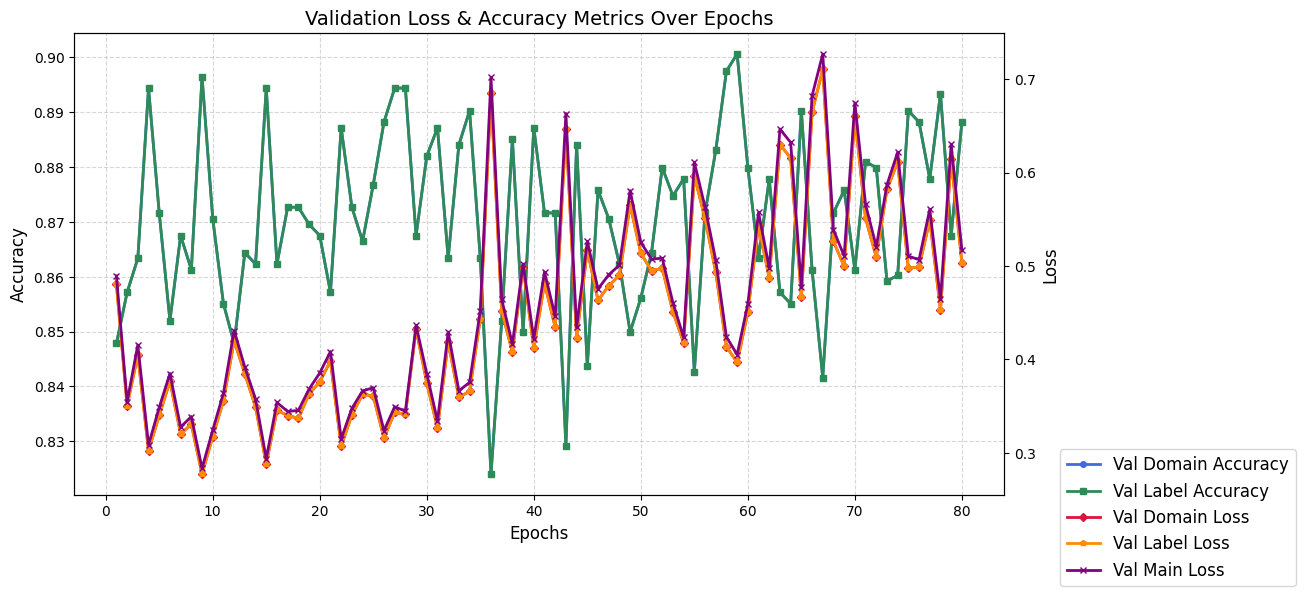

In [27]:
import numpy as np
import matplotlib.pyplot as plt

val_label_accuracy = [0.21946169435977936, 0.37577641010284424, 0.05486542358994484, 0.05590062215924263, 0.20082814991474152, 0.36335402727127075, 0.12318840622901917, 0.0838509351015091, 0.15320910513401031, 0.02380952425301075, 0.11180124431848526, 0.08902691304683685, 0.09006211161613464, 0.03209109604358673, 0.1304347813129425, 0.04037266969680786, 0.04037266969680786, 0.11387163400650024, 0.06832297891378403, 0.03830227628350258, 0.01656314730644226, 0.042443063110113144, 0.06107660382986069, 0.07349896430969238, 0.10351967066526413, 0.07556936144828796, 0.025879917666316032, 0.07246376574039459, 0.050724636763334274, 0.036231882870197296, 0.13561075925827026, 0.19358177483081818, 0.06728778779506683, 0.025879917666316032, 0.028985507786273956, 0.027950311079621315, 0.020703934133052826, 0.026915114372968674, 0.019668737426400185, 0.035196688026189804, 0.03726708143949509, 0.01552795059978962, 0.02380952425301075, 0.09420289844274521, 0.026915114372968674, 0.021739130839705467, 0.01552795059978962, 0.03933747485280037, 0.026915114372968674, 0.026915114372968674, 0.043478261679410934, 0.02380952425301075, 0.034161489456892014, 0.02380952425301075, 0.042443063110113144, 0.01552795059978962, 0.034161489456892014, 0.027950311079621315, 0.06935817748308182, 0.025879917666316032, 0.03933747485280037, 0.027950311079621315, 0.030020704492926598, 0.019668737426400185, 0.05279503017663956, 0.042443063110113144, 0.07349896430969238, 0.01552795059978962, 0.043478261679410934, 0.030020704492926598, 0.03105590119957924, 0.021739130839705467, 0.03209109604358673, 0.02380952425301075, 0.01656314730644226, 0.036231882870197296, 0.02484472095966339, 0.02484472095966339, 0.030020704492926598, 0.059006210416555405]

# Domain loss values
val_label_loss =[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

val_label_accuracy =[0.8478260636329651, 0.8571428656578064, 0.8633540272712708, 0.8944099545478821, 0.8716356158256531, 0.8519668579101562, 0.8674948215484619, 0.8612836599349976, 0.8964803218841553, 0.8706004023551941, 0.8550724387168884, 0.8478260636329651, 0.8643892407417297, 0.8623188138008118, 0.8944099545478821, 0.8623188138008118, 0.8726708292961121, 0.8726708292961121, 0.8695651888847351, 0.8674948215484619, 0.8571428656578064, 0.8871635794639587, 0.8726708292961121, 0.8664596080780029, 0.8768116235733032, 0.888198733329773, 0.8944099545478821, 0.8944099545478821, 0.8674948215484619, 0.8819875717163086, 0.8871635794639587, 0.8633540272712708, 0.8840579986572266, 0.8902691602706909, 0.8633540272712708, 0.8240165710449219, 0.8519668579101562, 0.8850931525230408, 0.8498964905738831, 0.8871635794639587, 0.8716356158256531, 0.8716356158256531, 0.8291925191879272, 0.8840579986572266, 0.8436853289604187, 0.8757764101028442, 0.8706004023551941, 0.8623188138008118, 0.8498964905738831, 0.8561076521873474, 0.8643892407417297, 0.8799172043800354, 0.8747411966323853, 0.8778467774391174, 0.8426501154899597, 0.8716356158256531, 0.8830227851867676, 0.8975155353546143, 0.9006211161613464, 0.8799172043800354, 0.8633540272712708, 0.8778467774391174, 0.8571428656578064, 0.8550724387168884, 0.8902691602706909, 0.8612836599349976, 0.8416149020195007, 0.8716356158256531, 0.8757764101028442, 0.8612836599349976, 0.8809523582458496, 0.8799172043800354, 0.8592132329940796, 0.8602484464645386, 0.8902691602706909, 0.888198733329773, 0.8778467774391174, 0.8933747410774231, 0.8674948215484619, 0.888198733329773]

# Domain loss values
val_label_loss = [0.4804314076900482, 0.3504851460456848, 0.4046855866909027, 0.3023073375225067, 0.34002044796943665, 0.37668368220329285, 0.32029610872268677, 0.3304464817047119, 0.2772503197193146, 0.31738463044166565, 0.35569465160369873, 0.41998496651649475, 0.3844687044620514, 0.34927377104759216, 0.28823113441467285, 0.3453892469406128, 0.339855819940567, 0.3368629217147827, 0.3629077970981598, 0.37600889801979065, 0.3982604444026947, 0.30703625082969666, 0.34057995676994324, 0.3627520799636841, 0.36076417565345764, 0.31578564643859863, 0.3432944715023041, 0.3411380350589752, 0.43257108330726624, 0.3748571276664734, 0.3265076279640198, 0.41849955916404724, 0.35933735966682434, 0.365844190120697, 0.44350960850715637, 0.6848028898239136, 0.4521128237247467, 0.4076218903064728, 0.4991663694381714, 0.4118812084197998, 0.48158618807792664, 0.4345141649246216, 0.647059977054596, 0.4233921468257904, 0.5172533988952637, 0.4631556272506714, 0.4789392948150635, 0.4898886978626251, 0.5654413104057312, 0.5137831568717957, 0.49485746026039124, 0.4976312220096588, 0.45107683539390564, 0.4178323745727539, 0.5968047976493835, 0.5509819984436035, 0.4935529828071594, 0.4137175381183624, 0.3966728746891022, 0.45076581835746765, 0.5436176061630249, 0.4870908558368683, 0.6300023794174194, 0.6158520579338074, 0.46683862805366516, 0.6646432280540466, 0.7105107307434082, 0.5264203548431396, 0.4995531141757965, 0.6601263284683228, 0.5511000156402588, 0.5095686316490173, 0.5821347832679749, 0.6114049553871155, 0.49750086665153503, 0.49909165501594543, 0.5492845177650452, 0.45319733023643494, 0.6143544912338257, 0.5035717487335205] 
# Main Validation Loss (Your provided values)
val_main_loss = np.array([0.489520400762558, 0.35459044575691223, 0.41549524664878845, 0.30842334032058716, 0.34867531061172485, 0.3848676383495331, 0.3274707794189453, 0.33880361914634705, 0.2833702266216278, 0.32430240511894226, 0.3638247549533844, 0.43090808391571045, 0.39166635274887085, 0.35761359333992004, 0.29380643367767334, 0.35382023453712463, 0.34425216913223267, 0.3453178405761719, 0.3682010769844055, 0.3854561746120453, 0.4083811342716217, 0.31490927934646606, 0.3474990427494049, 0.3662305176258087, 0.3696634769439697, 0.32373636960983276, 0.34929701685905457, 0.3444376289844513, 0.4365021884441376, 0.3846341669559479, 0.3340851664543152, 0.4292430877685547, 0.36629337072372437, 0.3754599094390869, 0.4522358477115631, 0.7019204497337341, 0.46413561701774597, 0.41654089093208313, 0.502187192440033, 0.42214006185531616, 0.49359017610549927, 0.4461560845375061, 0.6632291078567505, 0.4342663288116455, 0.5264025926589966, 0.4754452705383301, 0.4906030595302582, 0.5009523630142212, 0.5806140899658203, 0.5253362655639648, 0.5073791742324829, 0.5083548426628113, 0.46067696809768677, 0.4235391616821289, 0.611132025718689, 0.5630998015403748, 0.5063675045967102, 0.42402443289756775, 0.40516871213912964, 0.4594573676586151, 0.5573633313179016, 0.4977611005306244, 0.6466521620750427, 0.6322588920593262, 0.4778502285480499, 0.6821041107177734, 0.7270287275314331, 0.5387347936630249, 0.5107502341270447, 0.6746964454650879, 0.565877377986908, 0.5207721590995789, 0.5870547890663147, 0.6218463778495789, 0.5105075836181641, 0.5068124532699585, 0.5607835054397583, 0.4641976058483124, 0.6304556131362915, 0.5169657468795776])

# Define epochs
epochs = np.arange(1, len(val_main_loss) + 1)

# Create figure and first axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Accuracy (Primary Y-axis)
ax1.plot(epochs, val_domain_accuracy, marker='o', linestyle='-', color='royalblue', markersize=4, linewidth=2, label="Val Domain Accuracy")
ax1.plot(epochs, val_label_accuracy, marker='s', linestyle='-', color='seagreen', markersize=4, linewidth=2, label="Val Label Accuracy")
ax1.set_xlabel("Epochs", fontsize=12)
ax1.set_ylabel("Accuracy", fontsize=12, color='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.grid(True, linestyle="--", alpha=0.5)

# Create second Y-axis for Loss
ax2 = ax1.twinx()
ax2.plot(epochs, val_domain_loss, marker='D', linestyle='-', color='crimson', markersize=4, linewidth=2, label="Val Domain Loss")
ax2.plot(epochs, val_label_loss, marker='p', linestyle='-', color='darkorange', markersize=4, linewidth=2, label="Val Label Loss")
ax2.plot(epochs, val_main_loss, marker='x', linestyle='-', color='purple', markersize=5, linewidth=2, label="Val Main Loss")
ax2.set_ylabel("Loss", fontsize=12, color='black')
ax2.tick_params(axis='y', labelcolor='black')

# Title and Legends
plt.title("Validation Loss & Accuracy Metrics Over Epochs", fontsize=14)
fig.legend(loc="upper right", bbox_to_anchor=(1.15, 0.2), fontsize=12)

# Show the plot
plt.show()


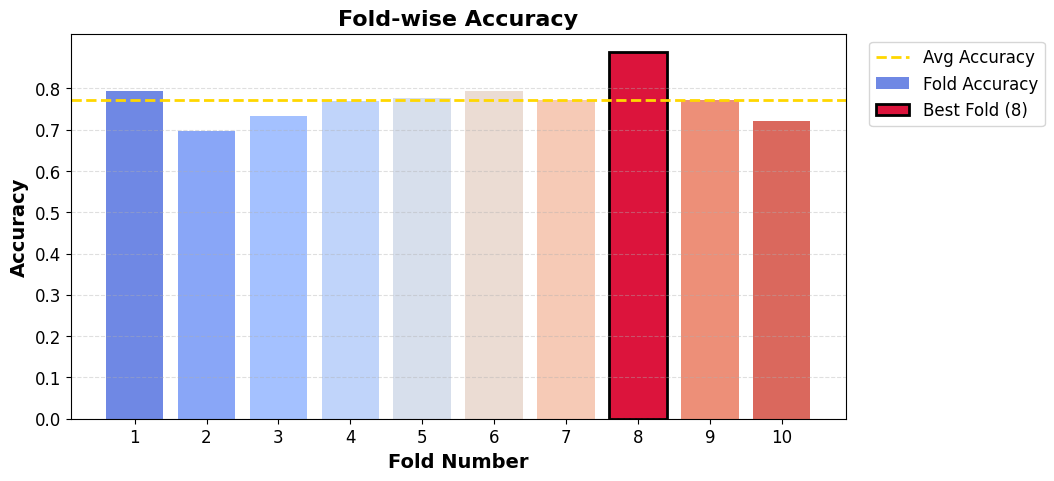

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data
folds = np.arange(1, 11)
fold_accuracies = [0.7945652008056641, 0.6968026757240295, 0.7341772317886353, 0.7697368264198303, 0.7769230604171753, 0.7948718070983887, 0.7730769515037537, 0.888198733329773, 0.7721925377845764, 0.72178477048873]
best_fold = 7
best_fold_acc = 0.8882

# Plot
plt.figure(figsize=(10, 5))
colors = sns.color_palette("coolwarm", len(folds))
plt.bar(folds, fold_accuracies, color=colors, alpha=0.85, label="Fold Accuracy")
plt.axhline(y=np.mean(fold_accuracies), color="gold", linestyle="--", linewidth=2, label="Avg Accuracy")
plt.bar(best_fold + 1, best_fold_acc, color="crimson", edgecolor="black", linewidth=2, label="Best Fold (8)")

# Labels & Titles
plt.xlabel("Fold Number", fontsize=14, fontweight="bold")
plt.ylabel("Accuracy", fontsize=14, fontweight="bold")
plt.title("Fold-wise Accuracy", fontsize=16, fontweight="bold")
plt.xticks(folds, fontsize=12)

# Fix y-axis ticks
plt.yticks(np.arange(0.0, 0.9, 0.1), fontsize=12)

# Move Legend **Outside** the Plot (More Upper Right)
plt.legend(fontsize=12, loc="upper left", bbox_to_anchor=(1.02, 1.0))

# Grid
plt.grid(axis="y", linestyle="--", alpha=0.4)

# Show plot
plt.show()


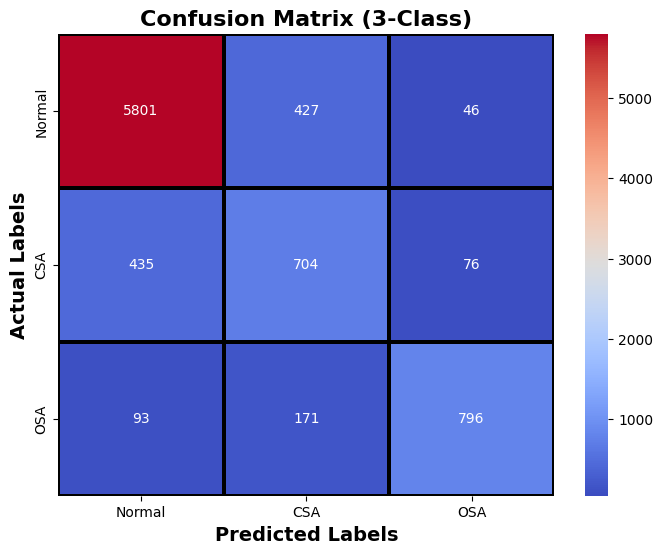

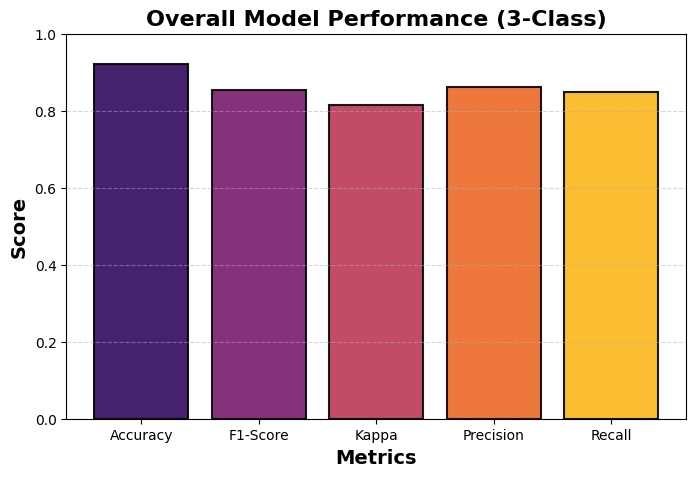

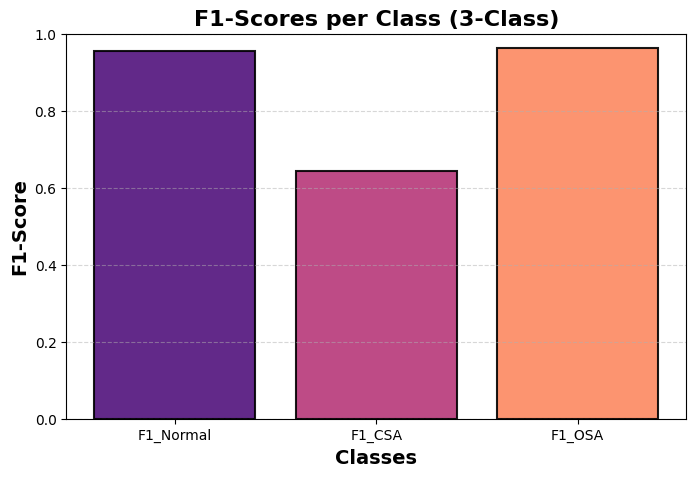

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ---- 1️⃣ Confusion Matrix ---- #
conf_matrix = np.array([
    [5801,  427,   46],  # Normal
    [ 435,  704,   76],  # CSA
    [  93,  171,  796]   # OSA
])

# Define class labels
classes = ["Normal", "CSA", "OSA"]

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="coolwarm", xticklabels=classes, yticklabels=classes, linewidths=1.5, linecolor="black", cbar=True)
plt.xlabel("Predicted Labels", fontsize=14, fontweight="bold")
plt.ylabel("Actual Labels", fontsize=14, fontweight="bold")
plt.title("Confusion Matrix (3-Class)", fontsize=16, fontweight="bold")
plt.show()


# ---- 2️⃣ Overall Performance Metrics ---- #
metrics = ["Accuracy", "F1-Score", "Kappa", "Precision", "Recall"]
values = [0.9224, 0.8536, 0.8145, 0.8611, 0.8481]  # Updated metrics

# Bar plot for model performance
plt.figure(figsize=(8, 5))
colors = sns.color_palette("inferno", len(metrics))
plt.bar(metrics, values, color=colors, alpha=0.9, edgecolor="black", linewidth=1.5)
plt.xlabel("Metrics", fontsize=14, fontweight="bold")
plt.ylabel("Score", fontsize=14, fontweight="bold")
plt.title("Overall Model Performance (3-Class)", fontsize=16, fontweight="bold")
plt.ylim(0, 1)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()


# ---- 3️⃣ F1-Scores for Each Class ---- #
f1_metrics = ["F1_Normal", "F1_CSA", "F1_OSA"]
f1_values = [0.9538, 0.6439, 0.9632]  # Updated F1-scores for each class

plt.figure(figsize=(8, 5))
colors = sns.color_palette("magma", len(f1_metrics))
plt.bar(f1_metrics, f1_values, color=colors, alpha=0.9, edgecolor="black", linewidth=1.5)
plt.xlabel("Classes", fontsize=14, fontweight="bold")
plt.ylabel("F1-Score", fontsize=14, fontweight="bold")
plt.title("F1-Scores per Class (3-Class)", fontsize=16, fontweight="bold")
plt.ylim(0, 1)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()


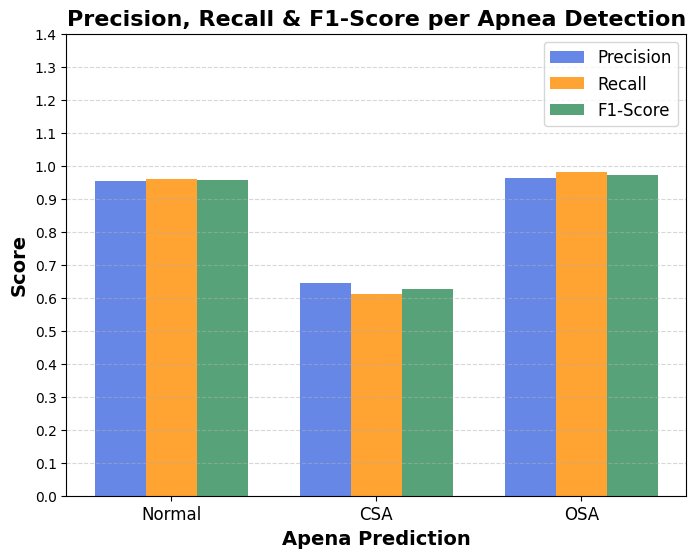

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Updated class labels for 3-class problem
classes = ["Normal", "CSA", "OSA"]

# Updated metrics for each class
precision = [0.9538, 0.6439, 0.9632]  # Precision per class
recall = [0.9600, 0.6100, 0.9800]  # Recall per class
f1_score = [0.9569, 0.6266, 0.9715]  # F1-score per class

# Bar width
bar_width = 0.25
x = np.arange(len(classes))

# Create figure
plt.figure(figsize=(8, 6))

# Plot bars
plt.bar(x - bar_width, precision, width=bar_width, color="royalblue", label="Precision", alpha=0.8)
plt.bar(x, recall, width=bar_width, color="darkorange", label="Recall", alpha=0.8)
plt.bar(x + bar_width, f1_score, width=bar_width, color="seagreen", label="F1-Score", alpha=0.8)

# Labels & Titles
plt.xlabel("Apena Prediction", fontsize=14, fontweight="bold")
plt.ylabel("Score", fontsize=14, fontweight="bold")
plt.title("Precision, Recall & F1-Score per Apnea Detection", fontsize=16, fontweight="bold")
plt.xticks(x, classes, fontsize=12)
plt.yticks(np.arange(0, 1.5, 0.1))
plt.legend(fontsize=12, loc="upper right")
plt.grid(axis="y", linestyle="--", alpha=0.5)

# Show plot
plt.show()
